In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("x_train.shape[0]:", x_train.shape[0])
print("x_train.shape[0]/32:", x_train.shape[0]/32)
print("y_train.shape:", y_train.shape)
y_test

x_train.shape: (50000, 32, 32, 3)
x_train.shape[0]: 50000
x_train.shape[0]/32: 1562.5
y_train.shape: (50000,)


array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [3]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [4]:
print(x_train[0])
print(x_train[0].shape)

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


In [5]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)
model.summary()


2022-04-25 22:45:44.731246: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-25 22:45:44.731407: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Max
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 15, 15, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)              

In [6]:
# Compile and fit
# Note: make sure you are using hte GPU for this!
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

2022-04-25 22:45:46.351611: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-04-25 22:45:46.351778: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-25 22:45:46.534748: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/15
1563/1563 [==============================] - ETA: 0s - loss: 1.5735 - accuracy: 0.4212

2022-04-25 22:45:59.563384: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 14s 7ms/step - loss: 1.5735 - accuracy: 0.4212 - val_loss: 1.2794 - val_accuracy: 0.5391
Epoch 2/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2702 - accuracy: 0.5427 - val_loss: 1.1676 - val_accuracy: 0.5812
Epoch 3/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1474 - accuracy: 0.5890 - val_loss: 1.0865 - val_accuracy: 0.6227
Epoch 4/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0558 - accuracy: 0.6224 - val_loss: 1.0094 - val_accuracy: 0.6400
Epoch 5/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9838 - accuracy: 0.6487 - val_loss: 0.9808 - val_accuracy: 0.6602
Epoch 6/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9142 - accuracy: 0.6742 - val_loss: 0.9426 - val_accuracy: 0.6675
Epoch 7/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8648 - accuracy: 0.6910 - val_loss: 0.9188 - val_accuracy: 0.6

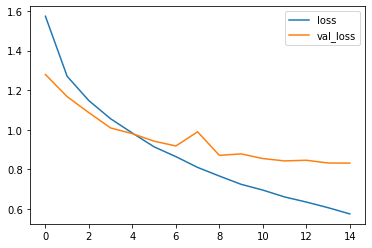

In [7]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

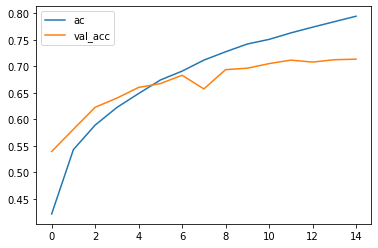

In [8]:
# Plot accuracy per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='ac')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

2022-04-25 22:49:26.376321: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Consusion matrix, without normalization
[[820  14  26  14  19   2   5   9  53  38]
 [ 20 841   2  13   4   5   7   4  21  83]
 [ 88   7 517  87 104  66  56  46  18  11]
 [ 33   8  41 581  67 128  53  55  16  18]
 [ 32   2  52  80 668  30  37  82  12   5]
 [ 20   4  35 232  57 538  22  70  11  11]
 [  5  15  38  73  46  29 770  13   6   5]
 [ 23   2   9  55  65  42   6 784   2  12]
 [ 67  26  12  14  16   3   2   6 826  28]
 [ 40  80   4  20   4   8   6  18  29 791]]


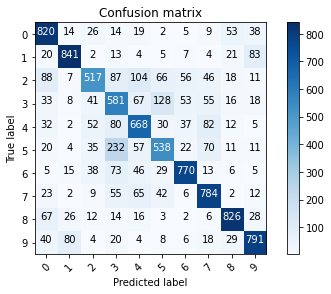

In [9]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes, 
                          normalize=False, 
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be appled by setting `normalize=True`.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("normalized confusion matrix")
  else:
    print('Consusion matrix, without normalization')
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [10]:
# Label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

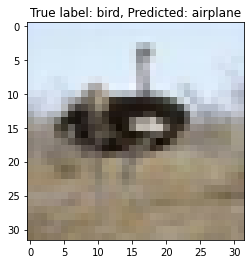

In [11]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s, Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));